<a href="https://colab.research.google.com/github/Liping-LZ/BDAO_ECDA/blob/main/Data_Preprocessing_and_EDA/BDAO_DataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing for Online Retail Dataset

This notebook outlines the data preprocessing steps applied to the Online Retail Dataset. The objective is to prepare the dataset for exploratory data analysis (EDA) and clustering. Each step is crucial for ensuring that the data is clean, relevant, and formatted correctly for further analysis or modeling.

---
### 1. Importing Libraries and Loading the Dataset

First, we import the necessary libraries and load the dataset into a pandas DataFrame.

In [5]:
# First, we need to load the dataset into Google Colab.
# This statement allows you to select the file from your laptop and upload it to Google Cloud.
# Please wait until you see 100% done and the play button is resumed. it might take a while to upload because the dataset is large

# Import necessary Python libraries
from google.colab import files

#Upload the dataset to Google Colab
uploaded = files.upload()

Saving OnlineRetail.csv to OnlineRetail.csv


In [6]:
# Import Libraries
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('OnlineRetail.csv', encoding='ISO-8859-1')

We can visualise the dataset using different [Pandas functions, such as head() (first five rows of the dataset) and tail() (last five rows of the dataset).](https://www.geeksforgeeks.org/pandas-functions-in-python/)

In [7]:
print("First five rows of the dataset:")
print(df.head())

print("Last five rows of the dataset:")
print(df.tail())

print("Size of the dataset:")
print(df.shape)

First five rows of the dataset:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

           InvoiceDate  UnitPrice  CustomerID         Country  
0  2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2  2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
Last five rows of the dataset:
       InvoiceNo StockCode                      Description  Quantity  \
541904    581587     22613      PACK OF 20 SPAC

---
### 2. Handling Missing or Null Values

Missing data can significantly impact the quality of the analysis. Therefore, we need to check for missing values and handle them appropriately. Handling missing values is crucial in data preprocessing, especially in fields like data analysis, machine learning, and statistics. The two primary methods for dealing with missing values are removing or replacing them. Choosing between these methods depends on the context and nature of your data.

In [8]:
# First, check and print the number of missing values (if there are any) in the dataset
print("Number of missing values:")
print(df.isnull().sum())

Number of missing values:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


Observe that the attributes Description and CustomerID contains missing values. We will deal with missing values by dropping rows with missing CustomerID values (as the dataset is big) and filling missing descriptions values with the string "No Description".

Additinally, we will remove duplicates.

In [9]:
# Drop rows where customer ID is empty/missing as it's essential for our analysis
df.dropna(subset=['CustomerID'], inplace=True)

# For missing descriptions, replace with 'No Description'
df['Description'].fillna('No Description', inplace=True)

# 2. Removing duplicates
# Drop duplicate rows to ensure data quality
df.drop_duplicates(inplace=True)

print("Size of the dataset:")
print(df.shape)

Size of the dataset:
(401604, 8)


---
### 3. Data Transformation

Transforming data into a suitable format for analysis is crucial. We convert the InvoiceDate from string to datetime and create new columns for Year, Month, Day, and TotalPrice.

In [10]:
# Data Transformation
# Convert InvoiceDate from string to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extracting Year, Month, Day for further analysis
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day

# Creating a 'TotalPrice' column for each row
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

print("First five rows of the dataset:")
print(df.head())

print("Size of the dataset:")
print(df.shape)

First five rows of the dataset:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  Year  Month  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  2010     12   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010     12   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  2010     12   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010     12   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010     12   

   Day  TotalPrice  
0    1       15.30  
1    1       20.34  
2    1   

---
### 4. Handling Outliers

Outliers can distort statistical analyses. We identify and filter out outliers based on the [Interquartile Range (IQR)](https://www.geeksforgeeks.org/interquartile-range-to-detect-outliers-in-data/) for Quantity and UnitPrice.

In [11]:
# Handling Outliers
# Identify outliers in 'Quantity' and 'UnitPrice'
Q1 = df[['Quantity', 'UnitPrice']].quantile(0.25)
Q3 = df[['Quantity', 'UnitPrice']].quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers based on IQR
df = df[~((df[['Quantity', 'UnitPrice']] < (Q1 - 1.5 * IQR)) | (df[['Quantity', 'UnitPrice']] > (Q3 + 1.5 * IQR))).any(axis=1)]

print(df.shape)

print(df.head())

(339453, 12)
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  Year  Month  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  2010     12   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010     12   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  2010     12   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010     12   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010     12   

   Day  TotalPrice  
0    1       15.30  
1    1       20.34  
2    1       22.00  
3    1 

---
### 5. Data Normalization

Normalizing data to have a mean of 0 and a standard deviation of 1 helps to compare features that have different units or scales.

In [12]:
# Data Normalization
# Initialize the StandardScaler
'''scaler = StandardScaler()

# Instead of directly setting the scaled values, use .loc to ensure we're modifying the DataFrame directly
df.loc[:, ['Quantity', 'TotalPrice']] = scaler.fit_transform(df[['Quantity', 'TotalPrice']])

# Print cleaned data information and head to verify
print(df.info())
print(df.head())'''

"scaler = StandardScaler()\n\n# Instead of directly setting the scaled values, use .loc to ensure we're modifying the DataFrame directly\ndf.loc[:, ['Quantity', 'TotalPrice']] = scaler.fit_transform(df[['Quantity', 'TotalPrice']])\n\n# Print cleaned data information and head to verify\nprint(df.info())\nprint(df.head())"

---
### 6. Feature Selection Matrix Analysis

Selecting the right features is crucial for effective modeling. We conclude our preprocessing by analysing the correlation among features.

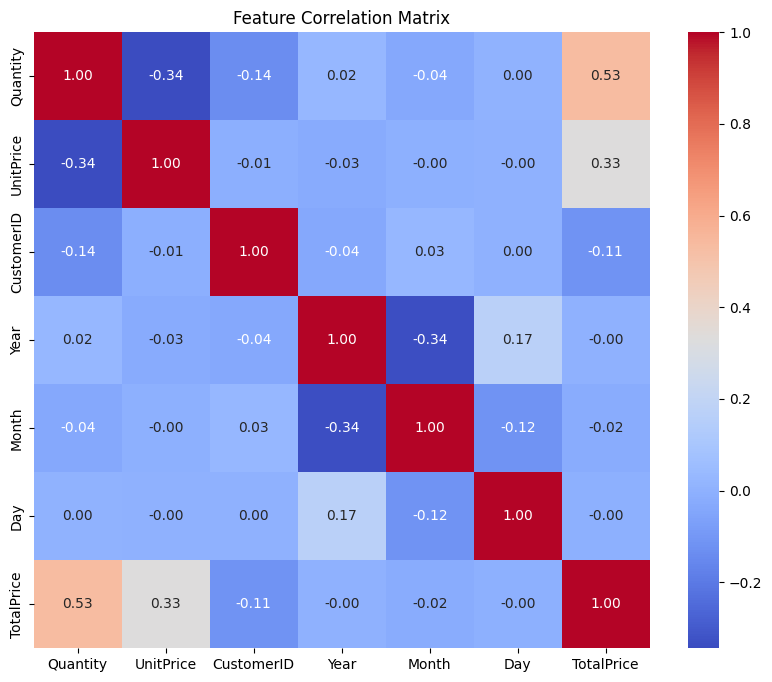

In [13]:
# Feature Selection
# Compute the correlation matrix to identify relationships between variables
correlation_matrix = df.corr(numeric_only=True)

# Use seaborn to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Feature Correlation Matrix')
plt.show()

Save the Preprocessed dataset.

In [ ]:
df.to_csv("OnlineRetailClean.csv", index = None, header=True)

---

# EDA Analysis


Descriptive Statistics:
            Quantity      UnitPrice     CustomerID           Year  \
count  339453.000000  339453.000000  339453.000000  339453.000000   
mean        7.350022       2.203459   15312.608184    2010.934810   
std         6.890369       1.549676    1711.910209       0.246861   
min       -13.000000       0.000000   12347.000000    2010.000000   
25%         2.000000       1.250000   13983.000000    2011.000000   
50%         6.000000       1.650000   15218.000000    2011.000000   
75%        12.000000       2.950000   16813.000000    2011.000000   
max        27.000000       7.500000   18287.000000    2011.000000   

               Month            Day     TotalPrice  
count  339453.000000  339453.000000  339453.000000  
mean        7.649262      15.043470      12.522085  
std         3.409939       8.658657      13.432954  
min         1.000000       1.000000     -81.000000  
25%         5.000000       7.000000       3.750000  
50%         9.000000      15.000000 

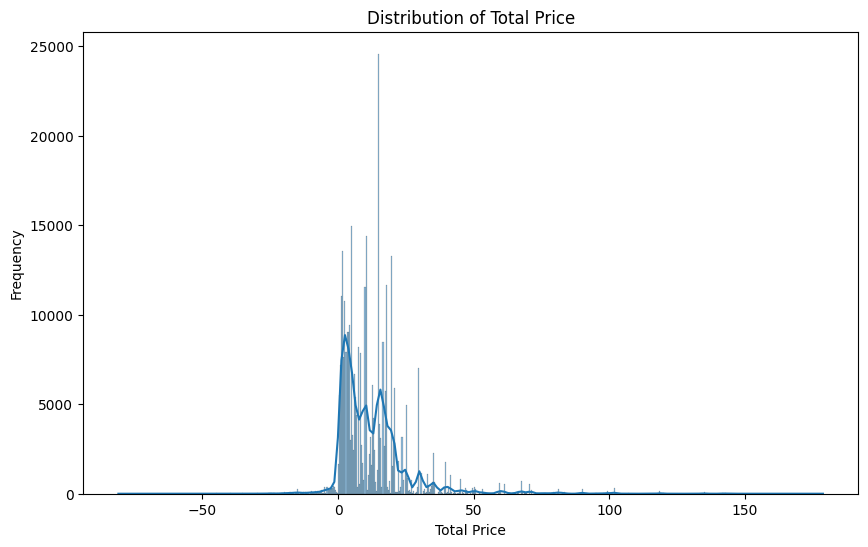

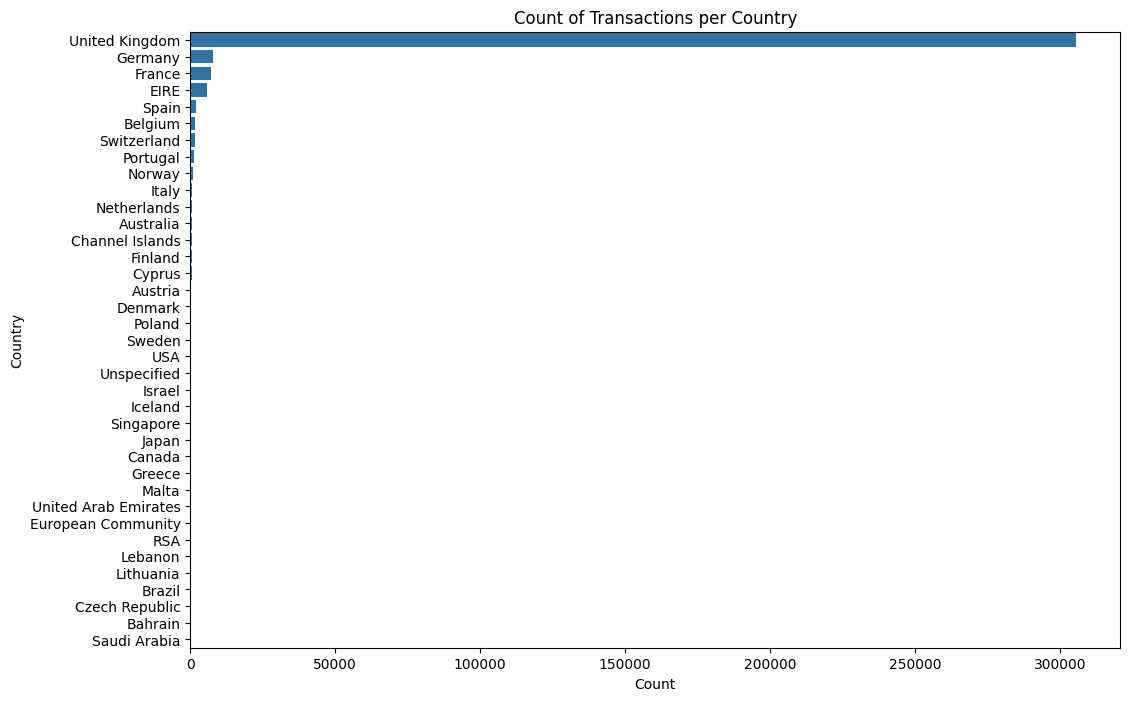

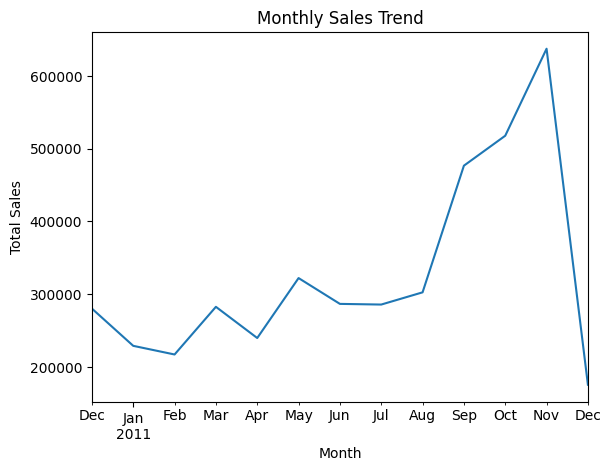

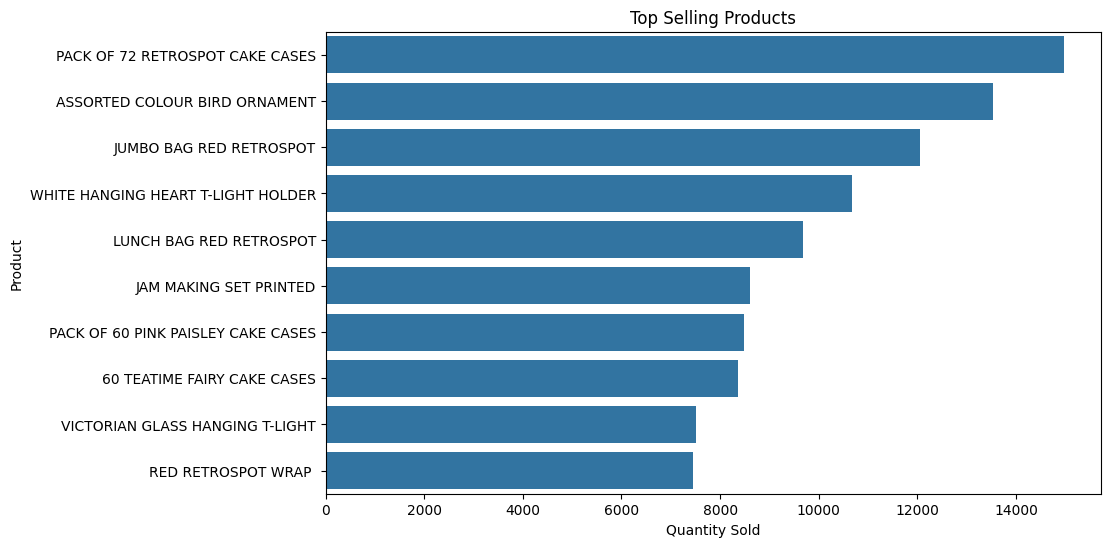

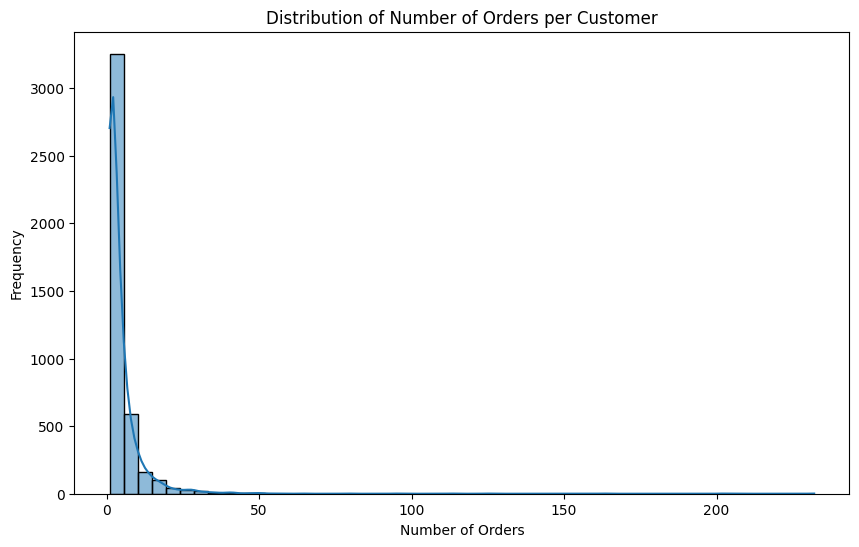

In [14]:
# Ensure matplotlib and seaborn are imported
import matplotlib.pyplot as plt
import seaborn as sns

#Copy DataFrame for EDA Analysis
df_for_eda = df.copy()

# Basic Information
print("Descriptive Statistics:")
print(df_for_eda.describe()) # Get statistical summaries of numeric columns

# Distribution of numeric data: Total Price
plt.figure(figsize=(10, 6))
sns.histplot(df_for_eda['TotalPrice'], kde=True)
plt.title('Distribution of Total Price')
plt.xlabel('Total Price')
plt.ylabel('Frequency')
#plt.suptitle('Fig.1: Histogram of Total Prices in the Dataset')
plt.show()

# Distribution of categorical data: Transactions per Country
plt.figure(figsize=(12, 8))
sns.countplot(y='Country', data=df_for_eda, order=df_for_eda['Country'].value_counts().index)
plt.title('Count of Transactions per Country')
plt.xlabel('Count')
plt.ylabel('Country')
#plt.suptitle('Fig.2: Count of Transactions per Country')
plt.show()

# Sales Trends over Time
df_for_eda['InvoiceDate'] = pd.to_datetime(df_for_eda['InvoiceDate'])
df_for_eda.set_index('InvoiceDate', inplace=True)
df_for_eda['TotalPrice'].resample('M').sum().plot()
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
#plt.suptitle('Fig.3: Monthly Sales Trends')
plt.show()

# Top Selling Products
top_products = df_for_eda.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products, y=top_products.index)
plt.title('Top Selling Products')
plt.xlabel('Quantity Sold')
plt.ylabel('Product')
#plt.suptitle('Fig.4: Top Selling Products in the Dataset')
plt.show()

# Distribution of Number of Orders per Customer
orders_per_customer = df_for_eda.groupby('CustomerID')['InvoiceNo'].nunique()
plt.figure(figsize=(10, 6))
sns.histplot(orders_per_customer, bins=50, kde=True)
plt.title('Distribution of Number of Orders per Customer')
plt.xlabel('Number of Orders')
plt.ylabel('Frequency')
#plt.suptitle('Fig.5: Distribution of Number of Orders per Customer')
plt.show()

# Your turn!

Repeat the analysis for a supermarket dataset!

In [15]:
# First, we need to load the dataset into Google Colab.
# This statement allows you to select the file from your laptop and upload it to Google Cloud.
# Please wait until you see 100% done and the play button is resumed. it might take a while to upload because the dataset is large

# Import necessary Python libraries
from google.colab import files

#Upload the dataset to Google Colab
uploaded = files.upload()

Saving supermarket_data_cleaned.csv to supermarket_data_cleaned.csv


In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df2 = pd.read_csv('supermarket_data_cleaned.csv')

print("First five rows of the dataset:")
print(df2.head())

print("Last five rows of the dataset:")
print(df2.tail())

print("Size of the dataset:")
print(df2.shape)

# First, check and print the number of missing values (if there are any) in the dataset
print("Number of missing values:")
print(df2.isnull().sum())

# Drop rows where customer ID is empty/missing as it's essential for our analysis
df2.dropna(inplace=True)

# 2. Removing duplicates
# Drop duplicate rows to ensure data quality
df2.drop_duplicates(inplace=True)

print("Size of the dataset after removing missing values:")
print(df2.shape)

# Feature Selection
# Compute the correlation matrix to identify relationships between variables
correlation_matrix = df2.corr(numeric_only=True)

# Use seaborn to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Feature Correlation Matrix')
plt.show()

## EDA

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Display the first few rows of the dataset to understand its structure
print(df2.head())

# Generate summary statistics for numerical attributes
print(df2.describe())

# Generate counts for categorical attributes if there are any
# In this case, we will assume 'Customer_ID' is categorical (even though it's numerical in nature)
print(df2['Customer_ID'].value_counts())

# Visualizations

# Histograms for numerical attributes
numerical_attributes = ['Age', 'Num_children', 'Family_size', 'Income', 'Recency',
                        'Total_spent', 'Total_num_purchase', 'Register_days', 'MntWines',
                        'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                        'MntSweetProducts', 'MntGoldProds']
for column in numerical_attributes:
    plt.figure(figsize=(10, 6))
    sns.histplot(df2[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

# Box plots for numerical attributes to check for outliers
for column in numerical_attributes:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df2[column])
    plt.title(f'Box plot of {column}')
    plt.show()

# Pairwise relationships
# Selecting a few attributes to avoid a very large pairplot
selected_attributes = ['Age', 'Income', 'Total_spent', 'Total_num_purchase', 'NumWebVisitsMonth']
sns.pairplot(df2[selected_attributes])
plt.show()

# Correlation heatmap
correlation_matrix = df2[numerical_attributes].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Bar plots for categorical data or discrete numerical data
# Example: Number of purchases by Family Size
plt.figure(figsize=(10, 6))
sns.barplot(x='Family_size', y='Total_num_purchase', data=df2, estimator=sum)
plt.title('Total Number of Purchases by Family Size')
plt.show()

# Scatter plot to explore the relationship between two variables of interest
# Example: Income vs Total Spent
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='Total_spent', data=df2)
plt.title('Income vs Total Spent')
plt.xlabel('Income')
plt.ylabel('Total Spent')
plt.show()

# Additional analyses can include more specific visualizations, advanced statistical tests,
# or segmentation using clustering algorithms if needed.